# PIK3CA: Effects of mutation in the hotspot compared to other mutations

In [12]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import CPTAC

In [13]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
gene = 'PIK3CA'
protein = 'PIK3CA'

#print(somatic)
print proteomics, "--------"

#print phos

idx   A1BG   A2M  A2ML1  A4GALT  AAAS  AACS  AADAT  AAED1  AAGAB  AAK1  ...   \
S001 -1.01 -0.81  -0.28    0.24  0.29  0.68   1.27  -0.33   0.27 -0.79  ...    
S002 -0.51 -1.00  -0.99    1.50  0.18  0.37   1.26   0.15   1.34 -0.54  ...    
S003 -0.56 -1.33   0.64     NaN -0.26  1.05  -0.10  -0.14   0.46 -0.62  ...    
S004 -1.53 -1.19  -0.49    0.26 -0.03  0.77   1.10  -0.93   0.26 -0.23  ...    
S005 -0.16  0.09   0.01    0.34  0.51 -0.05  -1.18    NaN   0.66 -0.28  ...    
S006 -1.03 -0.63  -0.04   -0.25 -0.09 -0.11   0.85   1.27   0.17  0.77  ...    
S007 -1.09 -0.60  -1.11    0.02  0.16  0.67  -0.37  -0.12   0.33 -0.15  ...    
S008 -0.29  0.51  -0.51     NaN  0.46  0.05  -0.22   0.18   0.11 -0.14  ...    
S009 -0.93 -1.28   0.67    0.43 -0.05  0.86  -0.22    NaN  -0.21  0.13  ...    
S010 -0.44 -0.87   2.83   -0.32  0.18  0.47  -0.15  -0.83  -0.01  0.11  ...    
S011 -0.13  0.03   0.61    2.03 -0.10  1.34    NaN  -0.87   0.26 -0.46  ...    
S012  1.55  1.67   0.43    0.70 -0.56  1

In [75]:
print(somatic.loc[(somatic['Gene'] == gene)])

      Patient_Id    Gene           Mutation        Location  \
4      C3L-00032  PIK3CA  Missense_Mutation         p.E545K   
1615   C3L-00947  PIK3CA  Missense_Mutation         p.E545K   
3114   C3L-01304  PIK3CA    Frame_Shift_Ins    p.N1068Kfs*5   
3689   C3L-01311  PIK3CA  Missense_Mutation          p.R88Q   
5564   C3N-00337  PIK3CA  Missense_Mutation          p.R38S   
5565   C3N-00337  PIK3CA       In_Frame_Del  p.E103_V105del   
5624   C3N-00383  PIK3CA  Missense_Mutation        p.H1047R   
6698   C3N-00858  PIK3CA  Missense_Mutation        p.M1043V   
6839   C3N-01001  PIK3CA  Missense_Mutation         p.E453K   
7327   C3L-00006  PIK3CA  Missense_Mutation         p.E545K   
8120   C3L-00362  PIK3CA  Missense_Mutation        p.H1047R   
10526  C3L-00586  PIK3CA  Missense_Mutation          p.F83S   
10527  C3L-00586  PIK3CA  Missense_Mutation          p.R88Q   
19465  C3L-00601  PIK3CA  Missense_Mutation         p.E545K   
22212  C3L-00918  PIK3CA  Missense_Mutation         p.E

In [76]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [77]:
print(len(mutated_hotspot))

19


# Phosphoproteomic Abundance

In [78]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)

## Patients with mutation and patients with mutation in the hotspot

In [79]:
print(len(p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']))
print(len(p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]))

42
19


## Hotspot mutation vs non-hotspot mutation

In [80]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

Ttest_indResult(statistic=-1.0551228306729392, pvalue=0.2977007205479019)


## Hotspot mutation vs other mutations and wildtype

In [81]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.276385531124315, pvalue=0.02499852654976874)


## All mutations vs wildtype

In [82]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.3709474235794348, pvalue=0.019698800138688424)


## Hotspot mutation v wildtype

In [83]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.7528037604409175, pvalue=0.0074071044313519544)


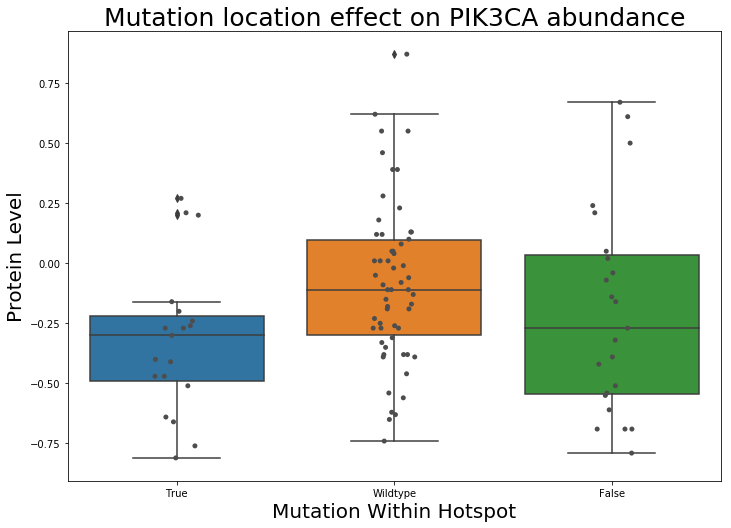

In [84]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PIK3CA abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [85]:
p10_mutations = CPTAC.compare_mutations(phos, protein, gene)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)

## Hotspot mutation vs non-hotspot mutation

In [86]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
phos_sites = ['PIK3CA-S312', 'PIK3CA-T313']
for site in phos_sites:
    ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
    print(ttest)

Ttest_indResult(statistic=0.6011288158583877, pvalue=0.569751875874764)
Ttest_indResult(statistic=-1.2062701350767784, pvalue=0.2731145388571341)


## Hotspot mutation vs other mutations and wildtype

In [87]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
phos_sites = ['PIK3CA-S312', 'PIK3CA-T313']
for site in phos_sites:
    ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
    print(ttest)

Ttest_indResult(statistic=-0.4465345522018853, pvalue=0.6611956862166855)
Ttest_indResult(statistic=-2.682534083189739, pvalue=0.016346013548157515)


## All mutations vs wildtype

In [88]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
for site in phos_sites:
    ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
    print(ttest)

Ttest_indResult(statistic=-2.097248963588519, pvalue=0.05221413286458461)
Ttest_indResult(statistic=-2.6363611609994835, pvalue=0.0179617573755326)


## Hotspot mutation v wildtype

In [89]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
for site in phos_sites:
    ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
    print(ttest)

Ttest_indResult(statistic=-1.106541217879592, pvalue=0.29210432413126164)
Ttest_indResult(statistic=-3.7830268553444455, pvalue=0.0030311283738734484)


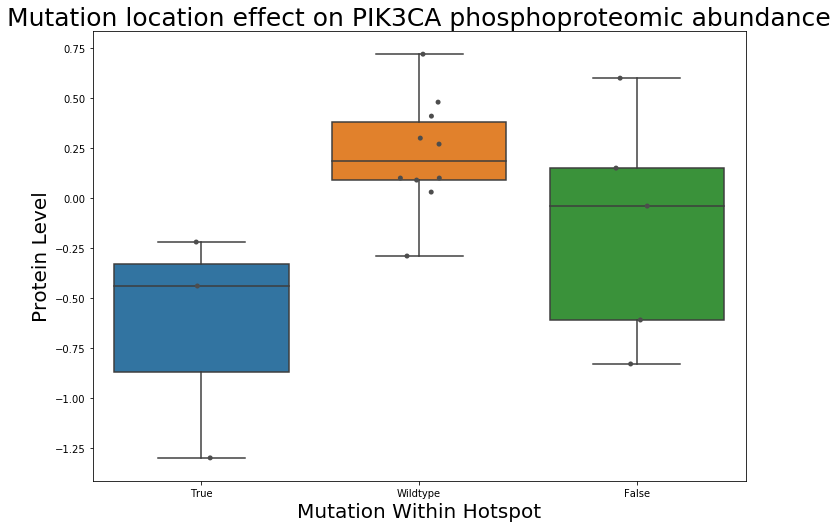

In [90]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = 'PIK3CA-T313', ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = 'PIK3CA-T313', jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PIK3CA phosphoproteomic abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()